<center>$\huge{\textbf{AI using Python}}$</center>
<center>$\hspace{.1cm}$</center>
<center>$\Large{\textbf{10. Multivariate Regression}}$</center>

---

<center>

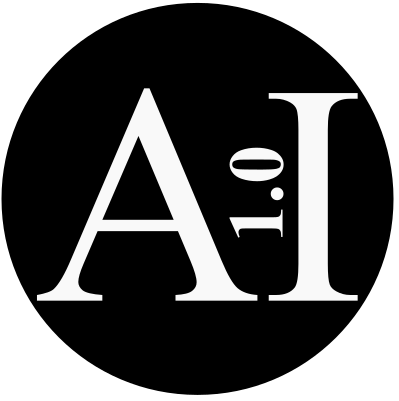

</center>

$\large{\textbf{10.1. Multivariate Regression}}$

*    In multivariate regression, the input and output data are multivariate.

* Let
   *   n:  number of input variables
   *   m: number of output variables

* In mulivariate regression $n>1$ and $m>1.$

* Multivariate regression can be grouped into
     1. $\color{red}{\textbf{Multivariate Linear Regression}}$: in which the model is linear.
     3. $\color{red}{\textbf{Multivariate Nonlinear Regression}}$: in which the model is nonlinear.


$\large{\textbf{10.2. Multivariate Linear Regression}}$

*    In multivariate linear regression the model is
\begin{equation}
\hat{y} = Ax + b
\end{equation}
where $x \in \mathbb{R}^{n},$ $\hat{y} \in \mathbb{R}^{m}$ and $A \in \mathbb{R}^{m\times n}, b \in  \mathbb{R}^{m}.$

*    The task is to find the $\textbf{optimal}$ weight $A$ and bias $b$ for a given data.
* $\textbf{Multiple Linear Regression}$: in which the model is linear and $n>1,$ $m=1.$
*   Training data contains

 1.   $\color{red}{\textbf{Inputs}}$: consists of $N$ observations $\{ x_{1}, x_{2},...,x_{N} \}$.
 2.   $\color{red}{\textbf{Outputs}}$: consists of $N$ labels $\{y_{1}, y_{2}, ..., y_{N} \}$.


${\textbf{Illustrating Multiple Linear Regression}}$

In [6]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

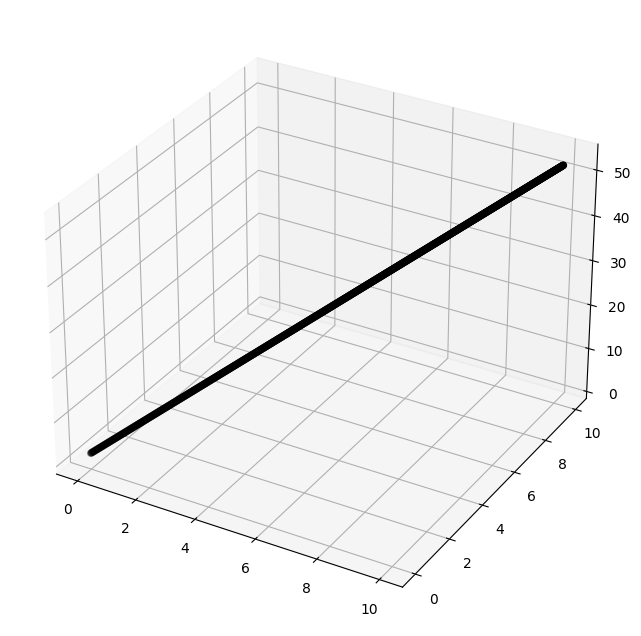

In [7]:
A=np.array([3,2])
b=2

X = np.array([np.linspace(0, 10, 1000),np.linspace(0, 10, 1000)])
Y = A[0]*X[0,:]+A[1]*X[1,:]+b

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0,:],X[1,:],Y, color = 'black')

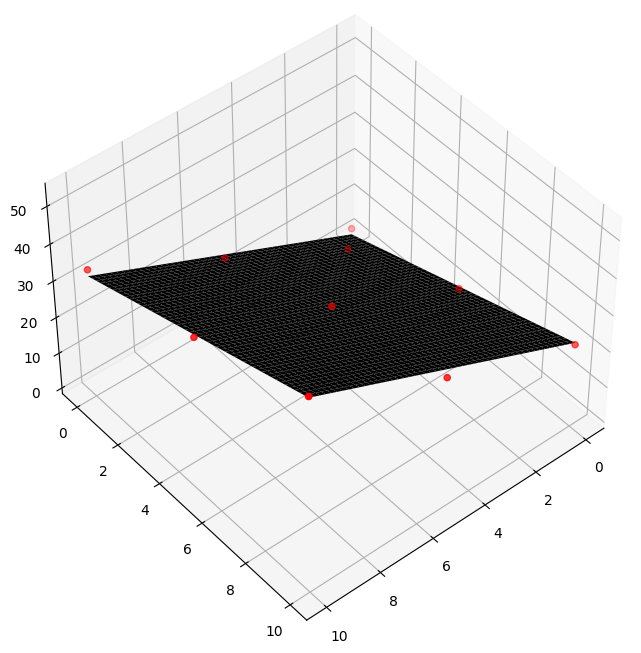

In [10]:
A=np.array([3,2])
b=2

X = np.array([np.linspace(0, 10, 1000),np.linspace(0, 10, 1000)])
X1,X2=np.meshgrid(X[0,:],X[1,:])
Y = A[0]*X1+A[1]*X2+b

rng = np.random.RandomState(1)
Xtr=np.array([[0,0],[0,5],[0,10],[5,0],[5,5],[5,10],[10,0],[10,5],[10,10],[1,1]])
#Xtr=5+3*rng.randn(100,2)
XtrT=np.transpose(Xtr)
Ytr=A[0]*XtrT[0,:]+A[1]*XtrT[1,:]+b+1*rng.randn(len(Xtr))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XtrT[0,:],XtrT[1,:],Ytr, color = 'red')
ax.plot_surface(X1, X2, Y, color = 'black')
ax.view_init(45, 50)

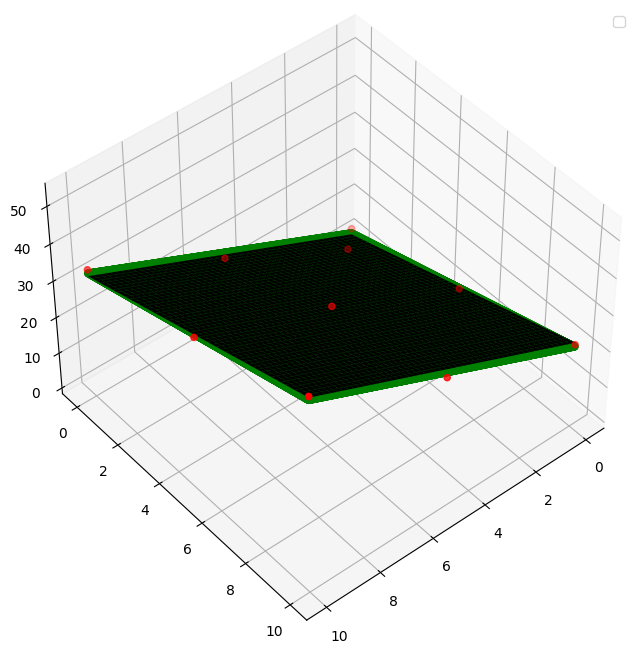

In [11]:
f_L = LinearRegression()
f_L.fit(Xtr,Ytr)

A_L = f_L.coef_
b_L = f_L.intercept_
YhatL = A_L[0]*X1+A_L[1]*X2+b_L

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XtrT[0,:],XtrT[1,:],Ytr, color = 'red')
ax.plot_surface(X1, X2, Y, color = 'black')
ax.scatter(X1, X2, YhatL, color = 'green')
ax.legend()
ax.view_init(45, 50)

${\textbf{Illustrating Multivariate Linear Regression}}$

In [12]:
A=np.array([[3,2,1],[4,1,5]])
b=([[2],[1]])

Xtr=5+3*rng.randn(100,3)
XtrT=np.transpose(Xtr)
Ytr=np.matmul(A,XtrT)+b+1*rng.randn(2,100)
YtrT=np.transpose(Ytr)

f_L = LinearRegression()
f_L.fit(Xtr,YtrT)
YhatL = f_L.predict(Xtr)

A_L = f_L.coef_
b_L = f_L.intercept_

In [13]:
A_L

array([[3.04741089, 2.05013142, 0.94031235],
       [3.97957256, 0.95966829, 5.02006934]])

In [14]:
b_L

array([1.74815445, 1.27121932])

In [15]:
from sklearn.metrics import mean_squared_error

mse_L = mean_squared_error(YtrT,YhatL)
mse_L

1.0288004406009161

$\large{\textbf{10.3. Multivariate Nonlinear Regression}}$

*   In multivariate nonlinear regression the  model is
\begin{equation}
\hat{y} = f(x,P)
\end{equation}
where $x \in \mathbb{R}^{n},$ $\hat{y} \in \mathbb{R}^{m}$ and $f : \mathbb{R}^{n} → \mathbb{R}^{m}.$

* $\textbf{Multiple Nonlinear Regression}$: in which the model is nonlinear and $n>1,$ $m=1.$

*   Nonlinear regression using $\textbf{Neural Network}$ (NN) model:
\begin{equation}
    \hat{y}=f_{NN}(x,P)=f_{L+1}(f_{L}(...(f_{0}(x))))
\end{equation}
where $f_{0},f_{1},...,f_{L+1}$ are layers of the NN.
*   The parameter $P$ is the weights and biases of each layer  in the NN which are to be optimized.
* To find $P,$ various optimization algorithms can be used that uses the training data and computes the optimal parameters which minimizes the cost function $J(y_{tr}-\hat{y})$.  



${\textbf{Illustrating Multiple Nonlinear Regression}}$

In [16]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

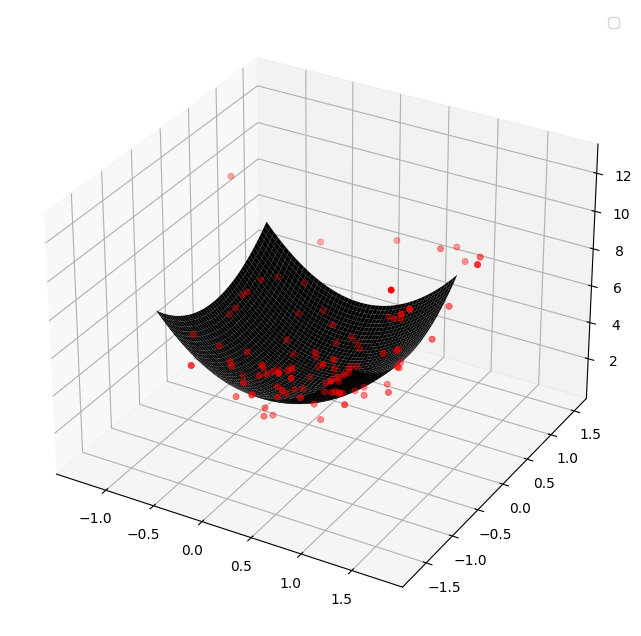

In [17]:
a1=3; a2=2; b=2;

X = np.array([np.linspace(-1, 1, 1000),np.linspace(-1, 1, 1000)])
X1,X2=np.meshgrid(X[0,:],X[1,:])
Y = a1*np.square(X1)+a2*np.square(X2)+b

rng = np.random.RandomState(1)
Xtr=0.7*rng.randn(100,2)
XtrT=np.transpose(Xtr)
Ytr=a1*np.square(XtrT[0,:])+a2*np.square(XtrT[1,:])+b+1*rng.randn(100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XtrT[0,:],XtrT[1,:],Ytr, color = 'red', linewidth=0.5)
ax.plot_surface(X1, X2, Y, color = 'black', linewidth =2)
ax.legend()
#ax.view_init(-45, 45)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


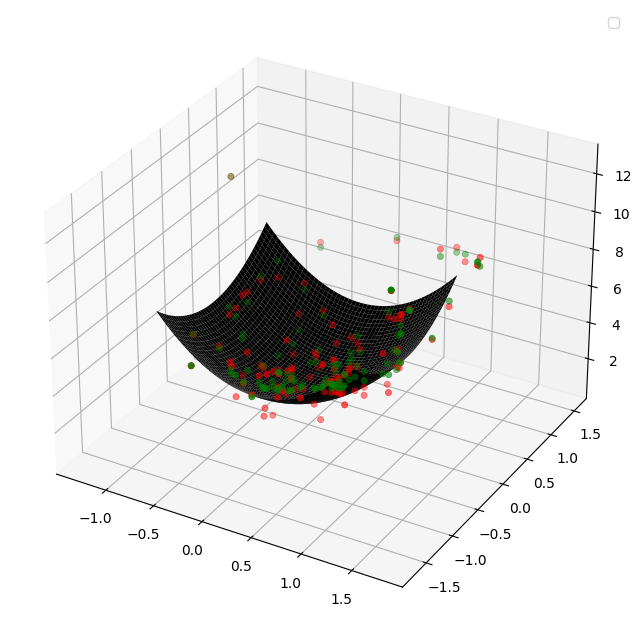

In [18]:
f_NN = MLPRegressor(hidden_layer_sizes=(3,3,3),activation="tanh" , solver='lbfgs', max_iter=10000)
f_NN.fit(Xtr,Ytr)
YhatNN = f_NN.predict(Xtr)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XtrT[0,:],XtrT[1,:],Ytr, color = 'red', linewidth=0.5)
ax.plot_surface(X1, X2, Y, color = 'black', linewidth =2)
ax.scatter(XtrT[0,:],XtrT[1,:],YhatNN, color = 'green', linewidth=0.5)
ax.legend()
#ax.view_init(-45, 45)

${\textbf{Illustrating Multivariate Nonlinear Regression}}$

In [19]:
A=np.array([[3,2,1],[4,1,5]])
b=([[2],[1]])

Xtr=5+3*rng.randn(100,3)
XtrT=np.transpose(Xtr)
Ytr=np.matmul(A,np.square(XtrT))+b+1*rng.randn(2,100)
YtrT=np.transpose(Ytr)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtr=scaler.fit_transform(Xtr)  # normalized data
YtrT=scaler.fit_transform(YtrT)

f_NN = MLPRegressor(hidden_layer_sizes=(3,3,3),activation="tanh" , solver='lbfgs', max_iter=10000)
f_NN.fit(Xtr,YtrT)
YhatNN = f_NN.predict(Xtr)

In [21]:
f_NN.coefs_

[array([[ 0.05356106, -0.13705385,  0.09626293],
        [-0.01660662,  0.10130062,  0.02462698],
        [-0.19474729,  0.02170613, -0.18301168]]),
 array([[-2.20509796,  0.86283794,  2.88803193],
        [-0.74512644,  2.06855998, -0.66798943],
        [ 0.12214433, -0.50529476, -3.02331357]]),
 array([[ 0.18066837,  1.26481299,  1.21348042],
        [ 1.37818213,  0.33866303, -0.55149339],
        [ 2.59952515, -0.11429018,  2.08718981]]),
 array([[-3.48285662, -3.13605454],
        [ 1.01219485,  4.58316348],
        [-2.06659669,  1.36253391]])]

In [22]:
f_NN.intercepts_

[array([-0.06795826, -0.0206358 , -0.24359485]),
 array([-1.54409496,  0.58394563,  0.29482639]),
 array([-1.72446703,  0.81027938,  0.75559137]),
 array([3.04824388, 1.34701356])]

In [23]:
from sklearn.metrics import mean_squared_error

mse_NN = mean_squared_error(YtrT,YhatNN)
mse_NN

0.0020551115646249814

$\large{\textbf{10.4 Thank you!}}$

In [24]:
print('Thank you')

Thank you
